In [1]:
import pandas as pd
import numpy as np
import statistics as sta
import warnings
warnings.filterwarnings('ignore')

In [2]:
RRRights = pd.read_csv('data/new/RejectRequestRights.csv')
countriesCode = pd.read_csv('data/countriesCode.csv')

#RENAME COLUMNS
countriesCode.columns = ['Country','CountryCode']
RRRights.rename(columns = {'SQLDATE':'Date','Actor1CountryCode':'CountryCode','SOURCEURL':'SourceURL','avgTone':'AvgTone'}, inplace=True)

#REMOVE SPACE
countriesCode['CountryCode'] = countriesCode['CountryCode'].str.strip()
countriesCode['Country'] = countriesCode['Country'].str.strip()

len(RRRights)

3651

In [3]:
RRRights.duplicated

<bound method DataFrame.duplicated of           Date CountryCode   AvgTone  \
0     20180102         GBR -1.937046   
1     20180102         GBR -1.937046   
2     20180102         BRA -2.500000   
3     20180102         BGR  2.255639   
4     20180103         LBN -3.614458   
5     20180103         PSE -6.553080   
6     20180103         PSE -6.553080   
7     20180103         ISR -6.553080   
8     20180103         LBN -3.614458   
9     20180103         LBN -3.861129   
10    20180103         BRA  1.658163   
11    20180103         AFG -4.525288   
12    20180103         USA -7.482305   
13    20180103         GBR -1.656315   
14    20180103         BRA -4.930663   
15    20180104         JPN  0.471143   
16    20180104         JPN  0.471143   
17    20180104         JPN  0.471143   
18    20180104         JPN  0.471143   
19    20180104         USA -1.734490   
20    20180104         JPN  0.471143   
21    20180104         JPN  0.471143   
22    20180105         ISR  0.064226   
23

In [4]:
#drop data duplicated
RRRightsDropDup = RRRights.drop_duplicates()
len(RRRightsDropDup)

2497

## MERGE DATA WITH COUNTRY CODE

In [5]:
RRRightsData = RRRightsDropDup.merge(countriesCode, on='CountryCode', how='left')
RRRightsData.info()
isnull = RRRightsData[RRRightsData.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2497 entries, 0 to 2496
Data columns (total 5 columns):
Date           2497 non-null int64
CountryCode    2497 non-null object
AvgTone        2497 non-null float64
SourceURL      2497 non-null object
Country        2427 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 117.0+ KB


In [6]:
isnull.groupby('CountryCode').count()

,Date,AvgTone,SourceURL,Country
CountryCode,,,,
AFR,32,32,32,0
EUR,24,24,24,0
SEA,1,1,1,0
SSD,1,1,1,0
TWN,8,8,8,0
WST,4,4,4,0


## MERGE DATA WITH ACTOR CODE

In [7]:
actorCodeData = pd.read_csv('data/actorCode.csv', delimiter = ',', encoding = "ISO-8859-1")
#RENAME COLUMNS
actorCodeData.columns = ['actorCode','Actor']
#REMOVE SPACE
actorCodeData['actorCode'] = actorCodeData['actorCode'].str.strip()
actorCodeData['Actor'] = actorCodeData['Actor'].str.strip()

RRRightsDatan = RRRightsData.merge(actorCodeData, left_on='CountryCode', right_on='actorCode', how='left')

#cek pengaruh MERGE DATA WITH ACTOR CODE
RRRightsDatan[(RRRightsDatan.Actor.notnull())&(RRRightsDatan.Country.isnull())]


,Date,CountryCode,AvgTone,SourceURL,Country,actorCode,Actor
135,20180119,EUR,-0.476190,http://www.pinknews.co.uk/2018/01/19/european-...,NaN,EUR,Europe
148,20180120,AFR,-2.450980,https://apanews.net/index.php/fr/news/la-justi...,NaN,AFR,Africa
161,20180122,AFR,1.605505,http://religionnews.com/2018/01/22/united-meth...,NaN,AFR,Africa
211,20180129,EUR,1.581028,https://www.studiocataldi.it/articoli/28990-fa...,NaN,EUR,Europe
249,20180202,EUR,-1.645207,http://www.telegraph.co.uk/politics/2018/02/02...,NaN,EUR,Europe
281,20180206,EUR,-2.772074,http://www.opinione.it/esteri/2018/02/06/ruthi...,NaN,EUR,Europe
361,20180213,AFR,-2.184874,http://www.livemint.com/Money/brfcqnRZ5rIh3acE...,NaN,AFR,Africa
380,20180215,AFR,-3.626473,https://www.stripes.com/news/africa/under-sieg...,NaN,AFR,Africa
381,20180215,EUR,3.225806,http://www.christian.org.uk/news/us-judge-soug...,NaN,EUR,Europe
583,20180309,AFR,-2.129925,https://medium.com/@ShaunKing/we-must-fully-un...,NaN,AFR,Africa


In [8]:
#INTERNATIONAL REGION CODES
RRRightsData.loc[RRRightsData['CountryCode'] == 'AFR', 'Country'] = 'Africa'
RRRightsData.loc[RRRightsData['CountryCode'] == 'EUR', 'Country'] = 'Europe'
RRRightsData.loc[RRRightsData['CountryCode'] == 'WST', 'Country'] = 'the West'
RRRightsData.loc[RRRightsData['CountryCode'] == 'SSD', 'Country'] = 'South Sudan'
RRRightsData.loc[RRRightsData['CountryCode'] == 'WAF', 'Country'] = 'West Africa'
RRRightsData.loc[RRRightsData['CountryCode'] == 'SEA', 'Country'] = 'Southeast Asia'

RRRightsData.loc[RRRightsData['CountryCode'] == 'TWN', 'Country'] = 'Taiwan'

RRRightsData.dropna(inplace=True)
RRRightsData[(RRRightsData.isnull().any(axis=1))]

,Date,CountryCode,AvgTone,SourceURL,Country


# DEVELOPING/DEVELOPED COUNTRY

In [9]:
devC = pd.read_csv('data/developingCountries.csv', delimiter = ',', encoding = "ISO-8859-1")
devC['CountryCat'] = 'developing'
devC.drop('Country', axis =1, inplace =True)
devC.dropna(inplace=True)

RRRights = RRRightsData.merge(devC, on=['CountryCode'], how='left')
RRRights.loc[RRRights.CountryCode.notnull(), 'CountryCat'] = RRRights.loc[RRRights.CountryCode.notnull(), 'CountryCat'].fillna('developed')
RRRights['HRTopic'] = 'reject request rights'
RRRights = RRRights[['Date','Country','CountryCode','CountryCat','HRTopic','AvgTone', 'SourceURL']]
RRRights

,Date,Country,CountryCode,CountryCat,HRTopic,AvgTone,SourceURL
0,20180102,United Kingdom,GBR,developed,reject request rights,-1.937046,https://g1.globo.com/rj/rio-de-janeiro/noticia...
1,20180102,Brazil,BRA,developing,reject request rights,-2.500000,http://www.ariquemesonline.com.br/noticia.asp?...
2,20180102,Bulgaria,BGR,developing,reject request rights,2.255639,http://alfa.mk/./News.aspx?id=127848
3,20180103,Lebanon,LBN,developing,reject request rights,-3.614458,http://www.eurasiareview.com/03012018-whats-be...
4,20180103,Occupied Palestinian Territory,PSE,developed,reject request rights,-6.553080,http://njjewishnews.com/article/36614/who-unle...
5,20180103,Israel,ISR,developed,reject request rights,-6.553080,http://njjewishnews.com/article/36614/who-unle...
6,20180103,Lebanon,LBN,developing,reject request rights,-3.861129,http://www.scoop.co.nz/stories/WO1801/S00022/w...
7,20180103,Brazil,BRA,developing,reject request rights,1.658163,https://www.conjur.com.br/2018-jan-03/tj-sp-ob...
8,20180103,Afghanistan,AFG,developing,reject request rights,-4.525288,http://www.aljazeera.com/indepth/opinion/afgha...
9,20180103,United States,USA,developed,reject request rights,-7.482305,http://www.nationalreview.com/article/455064/i...


In [10]:
RRRights.to_csv('MergingData/DataRRRights.csv', index=False)

/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


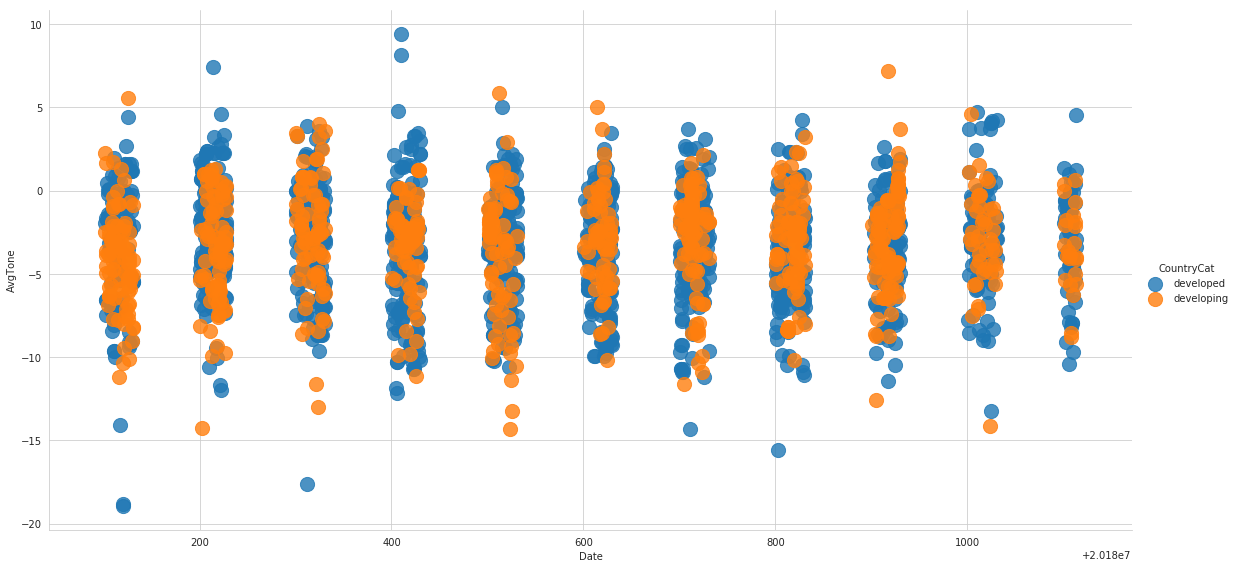

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns2 = sns.lmplot(data=RRRights, x='Date',y='AvgTone', hue='CountryCat', 
                  fit_reg=False, size=8, scatter_kws={'s':200},aspect=2)